# Single-Variable Polynomial Regression

Source: [Starting With Linear Regression in Python](https://realpython.com/courses/python-linear-regression/)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

sns.set_style("darkgrid")

## Dummy Data

In [3]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [4]:
y = np.array([15, 11, 2, 8, 25, 32])
y

array([15, 11,  2,  8, 25, 32])

## Create the polynomial variables from 'x': x, x^2

Without bias (i.e., without the first column of ones)

In [6]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [8]:
x_polynomial = transformer.fit_transform(x)
x_polynomial

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

## Fit a linear regression model with two variables: z1=x, z2=x^2

In [10]:
model = LinearRegression().fit(x_polynomial, y)

In [11]:
model.intercept_

21.37232142857144

In [12]:
model.coef_

array([-1.32357143,  0.02839286])

## R-Square score

In [15]:
model.score(x_polynomial, y)

0.8908516262498563

## Residuals

In [16]:
y - model.predict(x_polynomial)

array([-0.46428571,  3.09285714, -4.02857143, -1.82857143,  5.69285714,
       -2.46428571])

## Plot the polynomial line at degree=2

<Axes: >

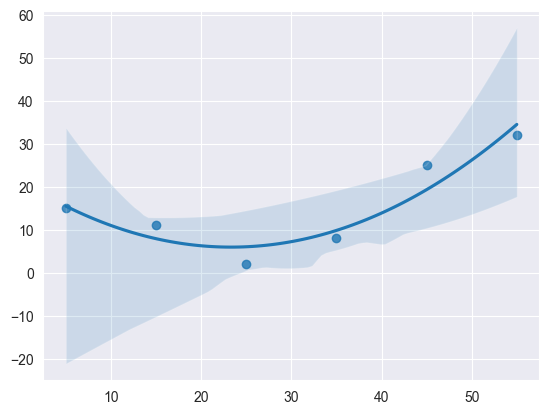

In [21]:
# Supress the warnings that the data is not a good fit for polynomial regression
import warnings
warnings.simplefilter('ignore', np.RankWarning)

sns.regplot(x=x, y=y, order=2)